In [2]:
import keras
from keras import layers

from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
encoded_dim=36

In [4]:
input = keras.Input(shape=(784,))
encoded = layers.Dense(encoded_dim, activation='relu')(input)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [5]:
autoencoder=keras.Model(input, decoded)

In [6]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [7]:
(x_train,_), (x_test,_) = mnist.load_data()

In [8]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train, epochs=70, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/70
235/235 [==============================] - 1s 3ms/step - loss: 0.2722 - accuracy: 0.0095 - val_loss: 0.1869 - val_accuracy: 0.0098
Epoch 2/70
235/235 [==============================] - 1s 3ms/step - loss: 0.1684 - accuracy: 0.0092 - val_loss: 0.1507 - val_accuracy: 0.0098
Epoch 3/70
235/235 [==============================] - 1s 3ms/step - loss: 0.1417 - accuracy: 0.0094 - val_loss: 0.1314 - val_accuracy: 0.0095
Epoch 4/70
235/235 [==============================] - 1s 3ms/step - loss: 0.1258 - accuracy: 0.0103 - val_loss: 0.1171 - val_accuracy: 0.0095
Epoch 5/70
235/235 [==============================] - 1s 3ms/step - loss: 0.1136 - accuracy: 0.0116 - val_loss: 0.1079 - val_accuracy: 0.0108
Epoch 6/70
235/235 [==============================] - 1s 3ms/step - loss: 0.1059 - accuracy: 0.0122 - val_loss: 0.1015 - val_accuracy: 0.0116
Epoch 7/70
235/235 [==============================] - 1s 3ms/step - loss: 0.1004 - accuracy: 0.0128 - val_loss: 0.0971 - val_accuracy: 0.0115
Epoch 

In [10]:
encoder = keras.Model(input, encoded)
encoded_input = keras.Input(shape=(encoded_dim,))
decoded_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoded_layer(encoded_input))


In [11]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 616us/step


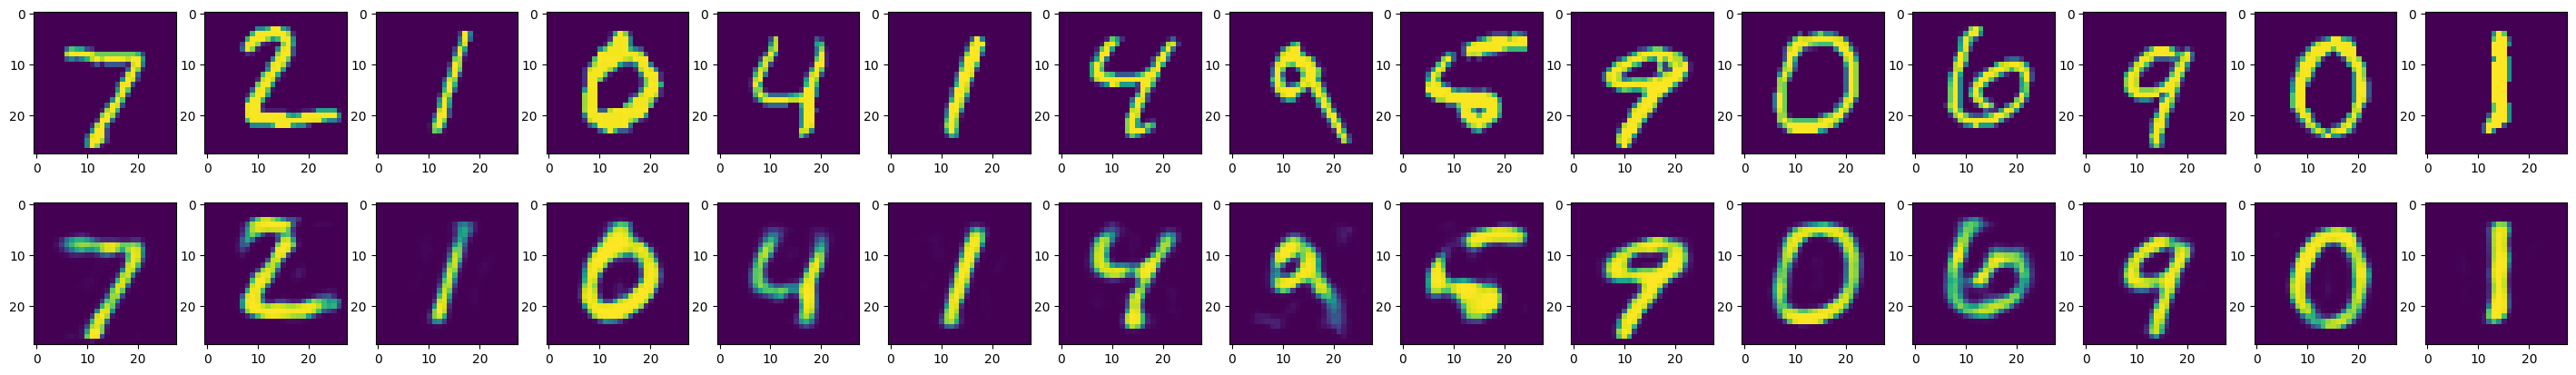

In [12]:
n=15
plt.figure(figsize=(36, 5))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
plt.show()